In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import os
import keras
from tensorflow.keras.utils import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

In [52]:
#loading Image to the data generator!
train_datagen = ImageDataGenerator(zoom_range=0.5, shear_range=0.3, horizontal_flip=True, preprocessing_function=preprocess_input)
validate_datagen = ImageDataGenerator( preprocessing_function=preprocess_input)

In [56]:
#This function would be performing preprocessing of the images!
train = train_datagen.flow_from_directory(directory="C:/Users/smc/Desktop/NewPlantDiseasesDataset/NewPlantDiseasesDataset/train",
                                          target_size=(256,256), 
                                          batch_size=32)
val = validate_datagen.flow_from_directory(directory="C:/Users/smc/Desktop/NewPlantDiseasesDataset/NewPlantDiseasesDataset/valid", target_size=(256,256), batch_size=32)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [58]:
t_img, label = train.next()

In [59]:
def plotImage(img_arr, label):
    for im, l in zip(img_arr, label):
        plt.figure(figsize=(5,5))
        plt.imshow(im)
        plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


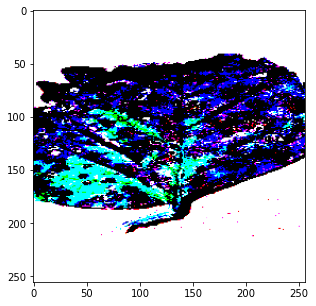

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


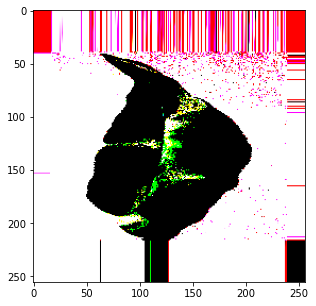

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


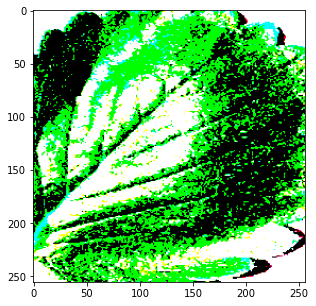

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


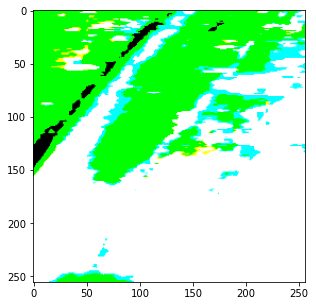

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


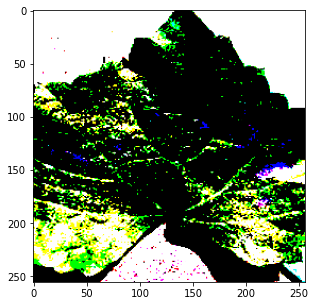

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


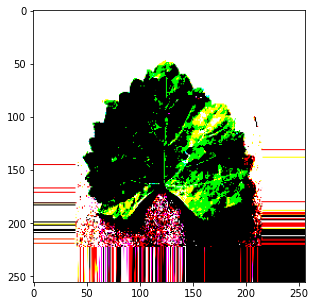

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


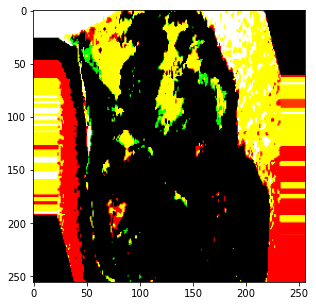

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


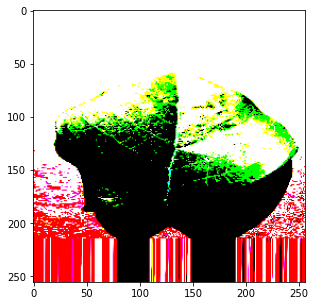

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


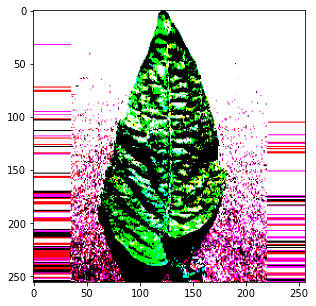

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


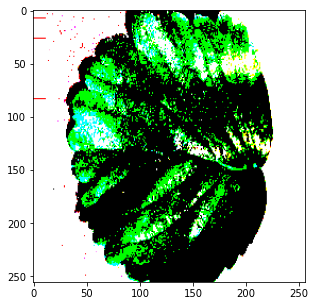

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


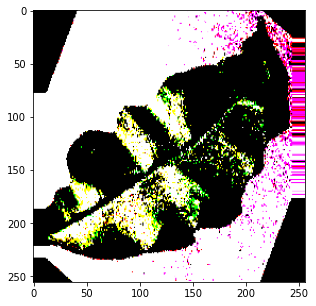

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


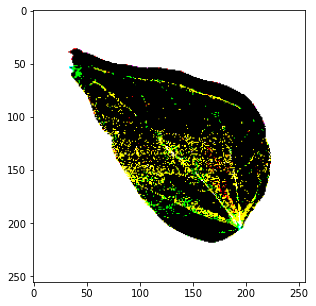

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


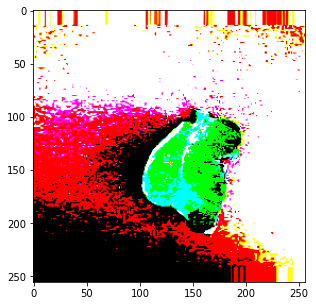

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


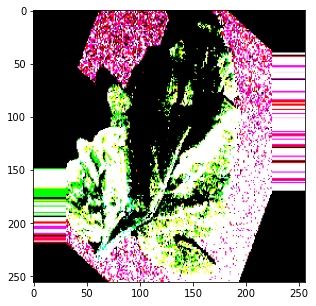

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


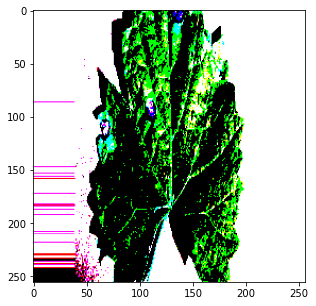

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


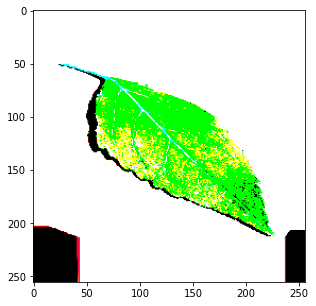

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


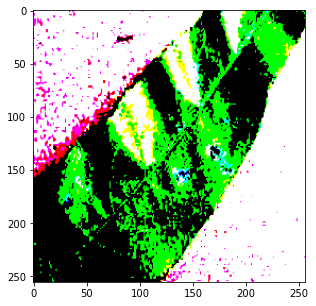

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


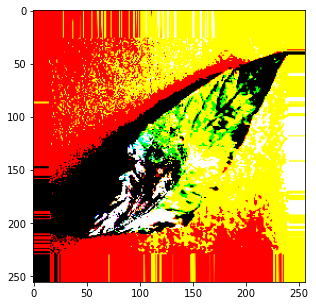

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


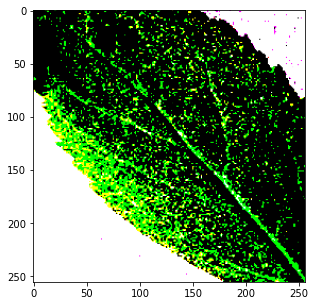

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


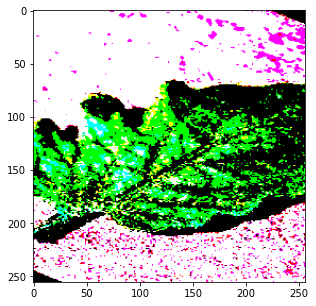

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


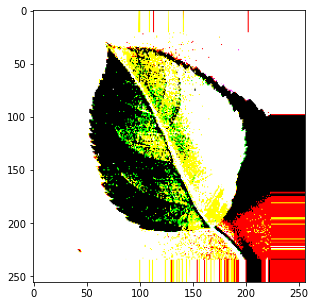

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


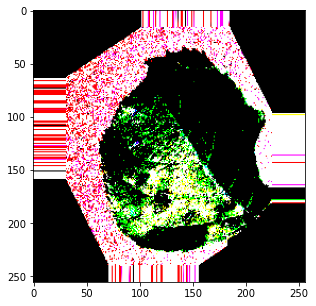

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


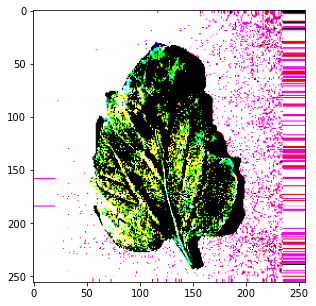

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


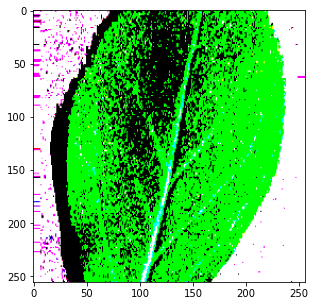

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


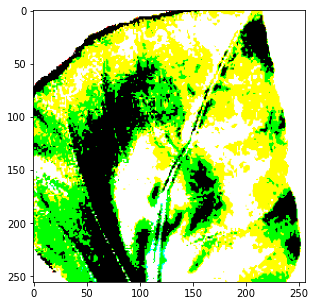

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


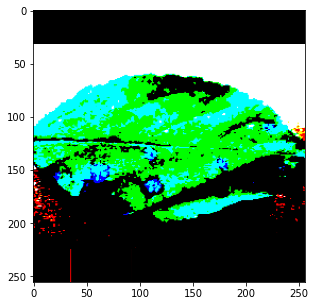

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


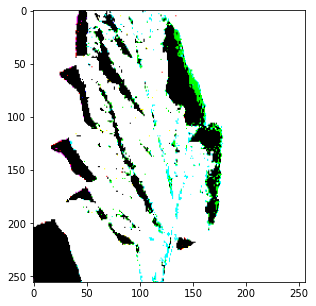

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


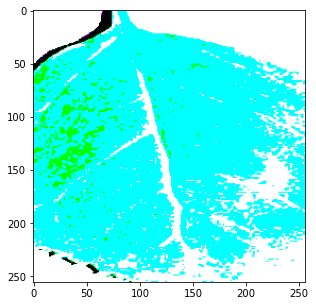

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


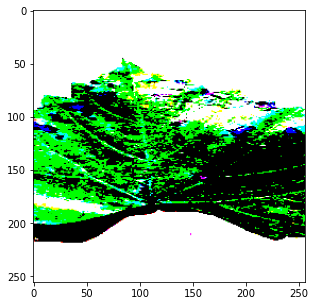

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


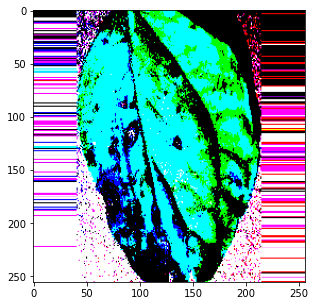

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


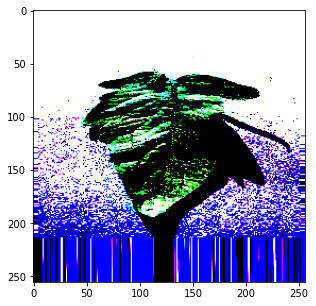

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


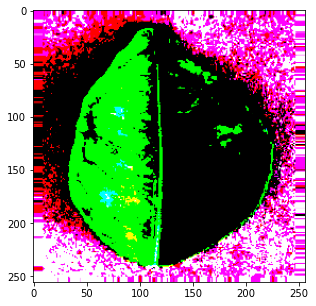

In [47]:
plotImage(t_img, label)

In [62]:
#Building the AI Model
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [65]:
baseModel = VGG19(input_shape=(256,256,3), include_top=False)

80134624/80134624 [==============================] - 190s 2us/step


In [66]:
baseModel.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [68]:
for layer in baseModel.layers:
    layer.trainable = False

In [69]:
X = Flatten()(baseModel.output)

X= Dense(units=38, activation='softmax')(X)

model = Model(baseModel.input, X)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [74]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [75]:
#Early Stopping and Model Checkpoint!!!

In [76]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

#Early Stopping!!

es = EarlyStopping(monitor = 'val_accuracy', min_delta=0.01, patience = 3, verbose = 1 )


#Model Checkpoint!!

mc = ModelCheckpoint(filepath='best_model.h5', 
                     monitor = 'val_accuracy', 
                     min_delta=0.01, 
                     patience = 3, 
                     verbose = 1, 
                     save_best_only=True)

cb = [es,mc]

In [77]:
history = model.fit_generator(train, 
                              steps_per_epoch=16, 
                              epochs=50, 
                              verbose=1,
                              callbacks=cb,
                              validation_data= val,
                              validation_steps = 16)

C:\Users\smc\AppData\Local\Temp\ipykernel_8528\2547042284.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train,


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 27.0208 - accuracy: 0.1582 
Epoch 1: val_accuracy improved from -inf to 0.40625, saving model to best_model.h5
16/16 [==============================] - 471s 30s/step - loss: 27.0208 - accuracy: 0.1582 - val_loss: 14.0533 - val_accuracy: 0.4062
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 14.2873 - accuracy: 0.4062 
Epoch 2: val_accuracy improved from 0.40625 to 0.56641, saving model to best_model.h5
16/16 [==============================] - 481s 31s/step - loss: 14.2873 - accuracy: 0.4062 - val_loss: 8.5966 - val_accuracy: 0.5664
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 11.5264 - accuracy: 0.5254 
Epoch 3: val_accuracy improved from 0.56641 to 0.66406, saving model to best_model.h5
16/16 [==============================] - 516s 33s/step - loss: 11.5264 - accuracy: 0.5254 - val_loss: 8.1589 - val_accuracy: 0.6641
Epoch 4/50
16/16 [==============================] - ETA: 0s 

In [78]:
h = history.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

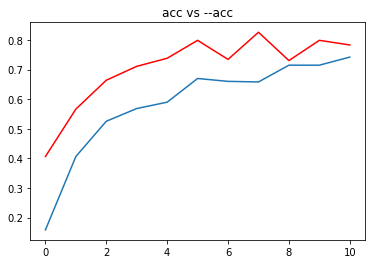

In [79]:
#Plotting accuracy graph!!!
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c="red")
plt.title("acc vs --acc")
plt.show()

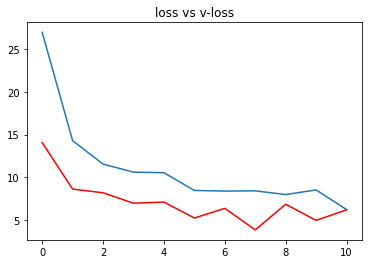

In [80]:
#Plotting loss graph!!!
plt.plot(h['loss'])
plt.plot(h['val_loss'], c="red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
#load best model

from keras.models import load_model
model = load_model("C:/Users/smc/best_model.h5")

In [ ]:
acc = model.evaluate_generator(val)[1]
print(f"Accuracy of your model is {acc*100}%")